In [1]:
#import the libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
#Generate syntatic data using make_blods

samples, true_labels = make_blobs(n_samples=500,centers=5,cluster_std=0.85, random_state=0)



In [3]:
#print five elements for each of the variables returned

print(samples.shape)
print("Samples of my data points:",samples[:5])
print("true label or category: ",true_labels[:5])

(500, 2)
Samples of my data points: [[ 2.60208482 -0.43736624]
 [ 0.03754424  4.34812764]
 [ 2.27913241  5.55274228]
 [-1.5195703   3.36583584]
 [ 0.08500006  3.09677208]]
true label or category:  [1 0 0 2 0]


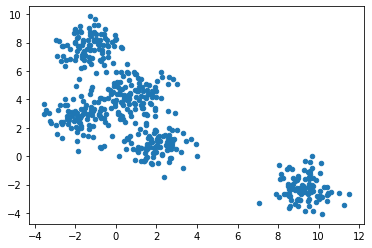

In [4]:
#plotting dataset
plt.scatter(samples[:,0],samples[:,1],s=20)
plt.show()

In [5]:
#running k means

kmeans = KMeans(init="random", n_clusters=5, n_init=10, max_iter=300, random_state=0)
kmeans.fit(samples)
y_kmeans = kmeans.predict(samples)


C:\Users\jamar\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


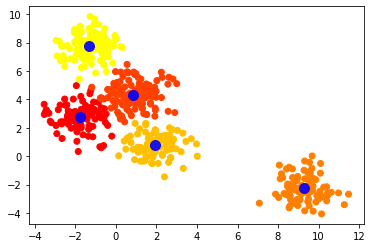

In [6]:
plt.scatter(samples[:,0],samples[:,1],c=y_kmeans, cmap='autumn')
center = kmeans.cluster_centers_
plt.scatter(center[:,0],center[:,1], c='blue', s=100, alpha=0.9)
plt.show()

In [7]:
#THe clusters assignments are store

print(kmeans.labels_[:5])
print(true_labels[:5])

[3 1 1 0 1]
[1 0 0 2 0]


In [8]:
#running the model using different configuration.
#sse = sum of squared error

kmean_kwarg = {"init":"random","n_init":10, "max_iter":1000, "random_state":42}

maximum_number_cluster = 6
sse = []

for k in range(1,maximum_number_cluster):
    kmeans = KMeans(n_clusters=k, **kmean_kwarg)
    kmeans.fit(samples)
    sse.append(kmeans.inertia_)


C:\Users\jamar\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jamar\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jamar\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jamar\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmea

Text(0, 0.5, 'SSE')

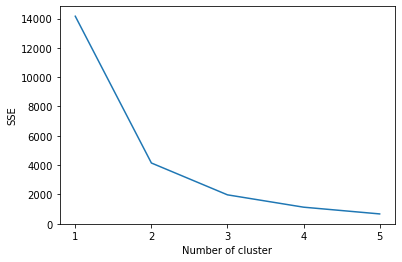

In [9]:
plt.plot(range(1,maximum_number_cluster),sse)
plt.xticks(range(1,maximum_number_cluster))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
